In [1]:
import pandas as pd

In [2]:
# Read file data to dataframe, explicitly setting S/N columns to string type because Pandas complains 
# about mixed types in the Paired Processor S/N column
data = pd.read_csv('Exercise_Input_20220502_Processor.csv',
                       dtype = {'Processor S/N': str, 'Paired Processor S/N': str},
                       parse_dates = ['Cloud Uploaded Timestamp From Site'])

In [3]:
# project out the columns needed
sn1_model = data[['Processor S/N', 'Device Model']]

In [4]:
# Create a dataframe with the paired processor s/n column and the device model column
# Drop rows where the paired processor s/n is empty
sn2_model = data[['Paired Processor S/N', 'Device Model']]
sn2_model.columns = ['Processor S/N', 'Device Model']
sn2_model = sn2_model.dropna(subset = ['Processor S/N'])

In [5]:
# Concatenate the above two dataframes to get a complete list of s/n and model pairs
sn_model_all = pd.concat([sn1_model, sn2_model])

In [6]:
# Remove duplicates since a processor can have multiple rows in this dataset
sn_model_unique = sn_model_all.drop_duplicates()

In [7]:
# drop rows with invalid paired processor s/n 
sn_model_unique = sn_model_unique[sn_model_unique['Processor S/N'].str.len() == 8]

In [8]:
# Group by device model 
sn_model_uniquecount = sn_model_unique.groupby(['Device Model']).size().reset_index(name='Counts')

In [9]:
# filter data for iPhone devices
mask_iphone = (sn_model_uniquecount['Device Model'].str.startswith('iPhone'))
sn_model_iphone = sn_model_uniquecount[mask_iphone]

<AxesSubplot:title={'center':'iPhone Distribution'}, xlabel='Device Model'>

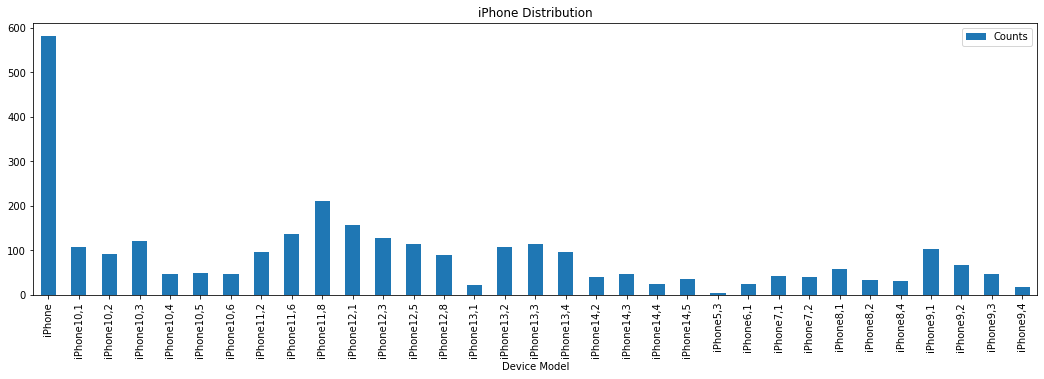

In [10]:
# graph iPhone device distribution
sn_model_iphone.plot.bar(x='Device Model',y='Counts', figsize=(18,5), title='iPhone Distribution')

In [11]:
# filter data for iPad devices
mask_ipad = (sn_model_uniquecount['Device Model'].str.startswith('iPad'))
sn_model_ipad = sn_model_uniquecount[mask_ipad]

<AxesSubplot:title={'center':'iPad Distribution'}, xlabel='Device Model'>

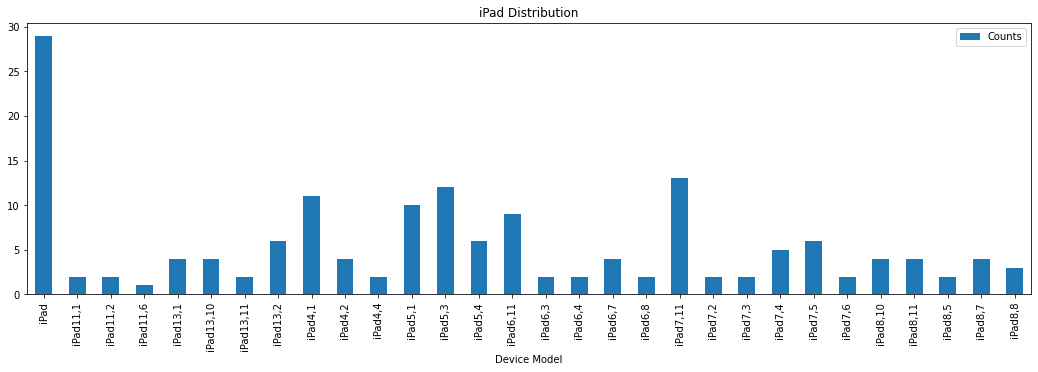

In [12]:
# graph iPad device distribution
sn_model_ipad.plot.bar(x='Device Model',y='Counts', figsize=(18,5), title='iPad Distribution')

In [13]:
# filter data for iPod devices
mask_ipod = (sn_model_uniquecount['Device Model'].str.startswith('iPod'))
sn_model_ipod = sn_model_uniquecount[mask_ipod]

<AxesSubplot:title={'center':'iPod Distribution'}, xlabel='Device Model'>

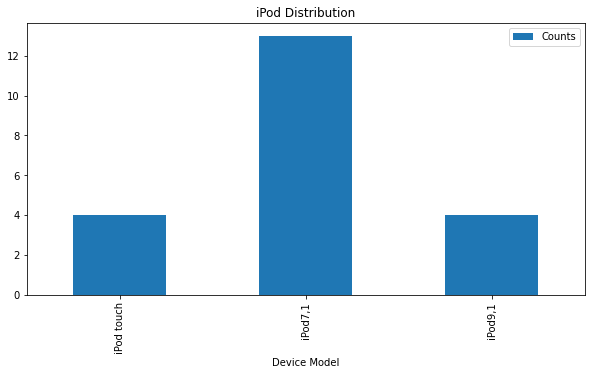

In [14]:
# graph iPod device distribution
sn_model_ipod.plot.bar(x='Device Model',y='Counts', figsize=(10,5), title='iPod Distribution')